
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png">


In [1]:
%%HTML
<style>

.CodeMirror {
    width: 100vw;
}

.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 120%;
}

</style>

#### Kort gennemgang af plotting biblioteker

1. matplotlib
2. Seaborn
3. bokeh
4. plotly
5. folium
6. pandas

In [2]:
import pandas as pd

avocados = pd.read_csv("../data/avocado.csv").drop("X1",axis=1)
avocados.head()

Date  AveragePrice  total_volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [3]:
subset = avocados.query("region < 'At'")\
    .query("type=='conventional'")

subset['Date'] = pd.to_datetime(subset.Date)
subset = subset.sort_values("Date")

## Data

Vi benytter et datasæt med avokado priser i USA

In [4]:
subset[["Date","AveragePrice","total_volume","type","year","region"]].head()

Date  AveragePrice  total_volume          type  year  region
51 2015-01-04          1.22      40873.28  conventional  2015  Albany
50 2015-01-11          1.24      41195.08  conventional  2015  Albany
49 2015-01-18          1.17      44511.28  conventional  2015  Albany
48 2015-01-25          1.06      45147.50  conventional  2015  Albany
47 2015-02-01          0.99      70873.60  conventional  2015  Albany

### 1. Matplotlib

<img src="https://matplotlib.org/_static/logo2.png">

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[12,5])
ax.plot('Date', 'AveragePrice', data=subset)

plt.show()

/home/christian/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 1200x500 with 1 Axes>

### 2. Bokeh

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRcOlFe1hof36QqiuWGL1sTawXbACmJICoF1KgycQeAbWRE8uXk">

Bokeh, boké (japansk: 暈け; boke, som betyder sløret og uklar)

In [6]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [7]:
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")

p.line(subset['Date'], subset['AveragePrice'], color='navy', alpha=0.5)

show(p)

### 3. Seaborn

<img src = "https://storage.googleapis.com/hackersandslackers-cdn/2019/06/seaborn-2@2x.jpg" width="1400">

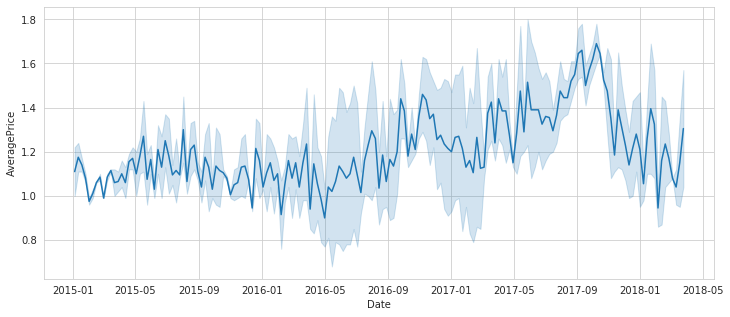

In [11]:
import seaborn as sns; sns.set_style("whitegrid")

plt.figure(figsize=(12,5))
sns.lineplot(x="Date", y="AveragePrice", data=subset)

In [12]:
subset = avocados.query("region < 'B'")\
    .query("type=='conventional'")

subset['Date'] = pd.to_datetime(subset.Date)
subset = subset.sort_values("Date")

## Multi-line plots

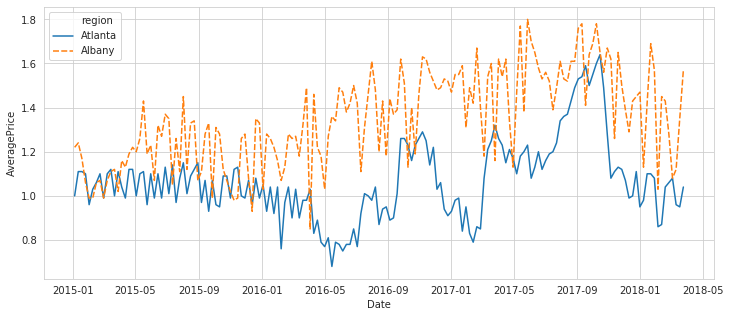

In [13]:
plt.figure(figsize=(12,5))

sns.lineplot(x="Date",
             y="AveragePrice",
             hue="region",
             style="region",
             data=subset)

## Scatterplot

In [14]:
diamonds = pd.read_csv("../data/diamonds.csv").query("price>2000 and price<10000 and carat<1.5")

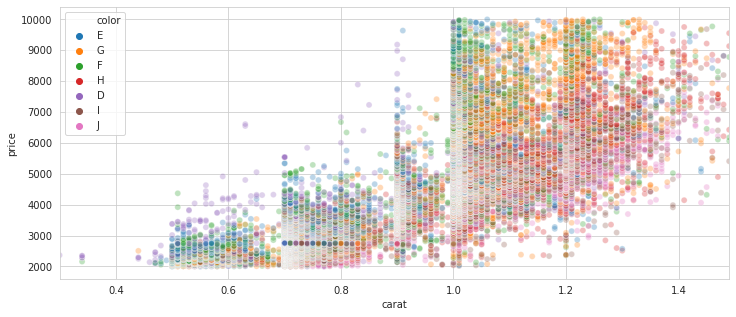

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=[12,5])
ax = sns.scatterplot(x="carat",
             y="price",
             hue="color",
             alpha=0.3,
             data=diamonds)
ax.set(xlim=(diamonds.carat.min(), diamonds.carat.max()))
plt.show()

### 4. Plotly

<img src="https://repository-images.githubusercontent.com/33702544/b4400c80-718b-11e9-9f3a-306c07a5f3de">

In [16]:
import plotly.graph_objects as go

two_states = subset.pivot(index='Date', columns='region', values='AveragePrice')

trace_high = go.Scatter(
                x=two_states.index,
                y=two_states.Albany,
                name = "Albany",
                line = dict(color = '#17BECF'),
                opacity = 0.8)
trace_low = go.Scatter(
                x=two_states.index,
                y=two_states['Atlanta'],
                name = "Atlanta",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

data = [trace_high,trace_low]
go.Figure(data)

## 6 Pandas plotting

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTChRYVPgFKEglHrQ90B1sVZe-Labnjt0brkvrJffcf9Kwzch4">

In [28]:
two_states.head(3)

region      Albany  Atlanta
Date                       
2015-01-04    1.22     1.00
2015-01-11    1.24     1.11
2015-01-18    1.17     1.11

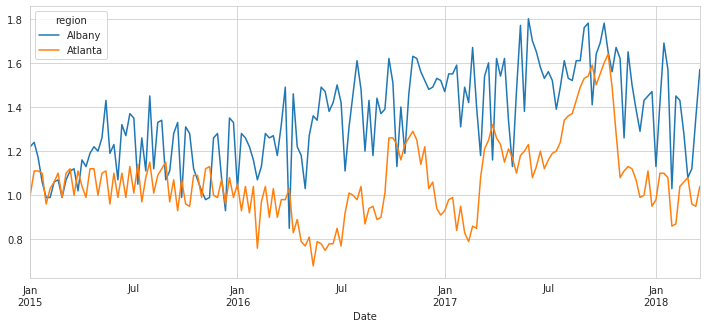

In [29]:

two_states.plot(figsize=[12,5])

## Folium

folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in a Leaflet map via folium.


<img src="https://assets.datacamp.com/production/repositories/2409/datasets/da9a5731c7737d7ffe512b856812c710fe89c3cf/folium_logo.png">

In [30]:
import folium
l = [46.8527, -121.7649]#[55.7069842,12.5971796]
m = folium.Map(
    location=l,
    tiles='Stamen Terrain',
    zoom_start=13
)
folium.Marker(l,popup='Mount Munir').add_to(m)
m

## Kan anvendes til at lave choropleths

In [31]:
import json
import requests
import branca

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
county_data = f'{url}/us_county_data.csv'
county_geo = f'{url}/us_counties_20m_topo.json'


df = pd.read_csv(county_data, na_values=[' '])

colorscale = branca.colormap.linear.YlGnBu_09.scale(0, 30)

employed_series = df.set_index('FIPS_Code')['Unemployment_rate_2011']


def style_function(feature):
    employed = employed_series.get(int(feature['id'][-5:]), None)
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': '#black' if employed is None else colorscale(employed)
    }


m = folium.Map(
    location=[48, -102],
    tiles='cartodbpositron',
    zoom_start=3
)

folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    'objects.us_counties_20m',
    style_function=style_function
).add_to(m)

In [32]:
m

# Exercise 1.1

Peru står for 13% af den samlede avocado produktion, og de har hyret dig til at redegøre for prisudbviklingen i to af deres større afsætnings områder på den amerikanske øst-kyst, nemlig Boston og Albany.  

<img src="https://cdn.winsightmedia.com/platform/files/public/gb/June-2012/Peruvian-Avocados-Return-to-the-United-States/PAC-Billboard.jpg" width = 600>

Anvend argumenter i plotly så prisen-udviklingen over tid har de faktorer, som redegør for pris-udsving for samme dato.   

- Plot prisen på avocadoer over tid for de to stater
- overvej håndtering af avocado typen i.e. "conventional" and "organic"
- argumenterne `style` og `hue` kan bruges
